# Australian Grand Prix 2024

In [1]:
import numpy as np
import fastf1
import fastf1.plotting
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from fastf1.core import Laps
from timple.timedelta import strftimedelta
from fastf1.ergast import Ergast
import plotly.express as px
from plotly.io import show
import matplotlib.font_manager as font_manager
fastf1.plotting.setup_mpl()
import sys
import warnings
warnings.filterwarnings("ignore")

______
### Set up Formula1 Font
----

In [2]:
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Formula'.lower() in fontpath.lower():
        print(fontpath)

C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Bold_web.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Regular-1.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Black.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Italic.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Regular.otf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Wide.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Wide.otf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Bold-4.ttf


In [3]:
personal_path = '\\Users\\ricca\\AppData\\Local\\Microsoft\\Windows\\Fonts'


font_path = personal_path + '\\Formula1-Regular-1.ttf'
regular = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Bold-4.ttf' 
bold = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Black.ttf'
black = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Wide.ttf'
wide = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Italic.ttf'
italic = FontProperties(fname=font_path)


____

In [4]:
sys.path.insert(0, "../")
from settings import CACHE_FOLDER_PATH
from utlis import *

CACHE_FOLDER_PATH: C:\Users\ricca\OneDrive - ZHAW\Dokumente\f1_cache


In [5]:
setup_cache(CACHE_FOLDER_PATH)

In [6]:
session = fastf1.get_session(2024, 'Melbourne', 'R')
session.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']


In [7]:
laps = session.laps

![Bahrain Circuit](https://media.formula1.com/image/upload/f_auto/q_auto/v1677244985/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Australia_Circuit.png.transform/5col-retina/image.png)

It's already the third round and we'll take a look at the scored points to this points 

In [8]:
ergast = Ergast()
races = ergast.get_race_schedule(2024)  # Races in the year 2024
results = []

In [9]:

for rnd, race in races['raceName'].items():
    race_results = ergast.get_race_results(season=2024, round=rnd + 1)
    if race_results.content: 
        temp = race_results.content[0]


        sprint_results = ergast.get_sprint_results(season=2024, round=rnd + 1)
        if sprint_results.content and sprint_results.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint_results.content[0], on='driverCode', how='left')
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'driverCode', 'points']]  
        results.append(temp)


results = pd.concat(results)
races = results['race'].drop_duplicates()

pivot = results.pivot_table(index='round', columns='driverCode', values='points', aggfunc='sum').fillna(0).cumsum()
zero_row = pd.DataFrame(0, index=[0], columns=pivot.columns)
new_pivot = pd.concat([zero_row, pivot])

new_pivot.reset_index(drop = True, inplace=True)

In [10]:
races_list = races.tolist()
races_list.insert(0, "Start")
races = pd.Series(races_list)

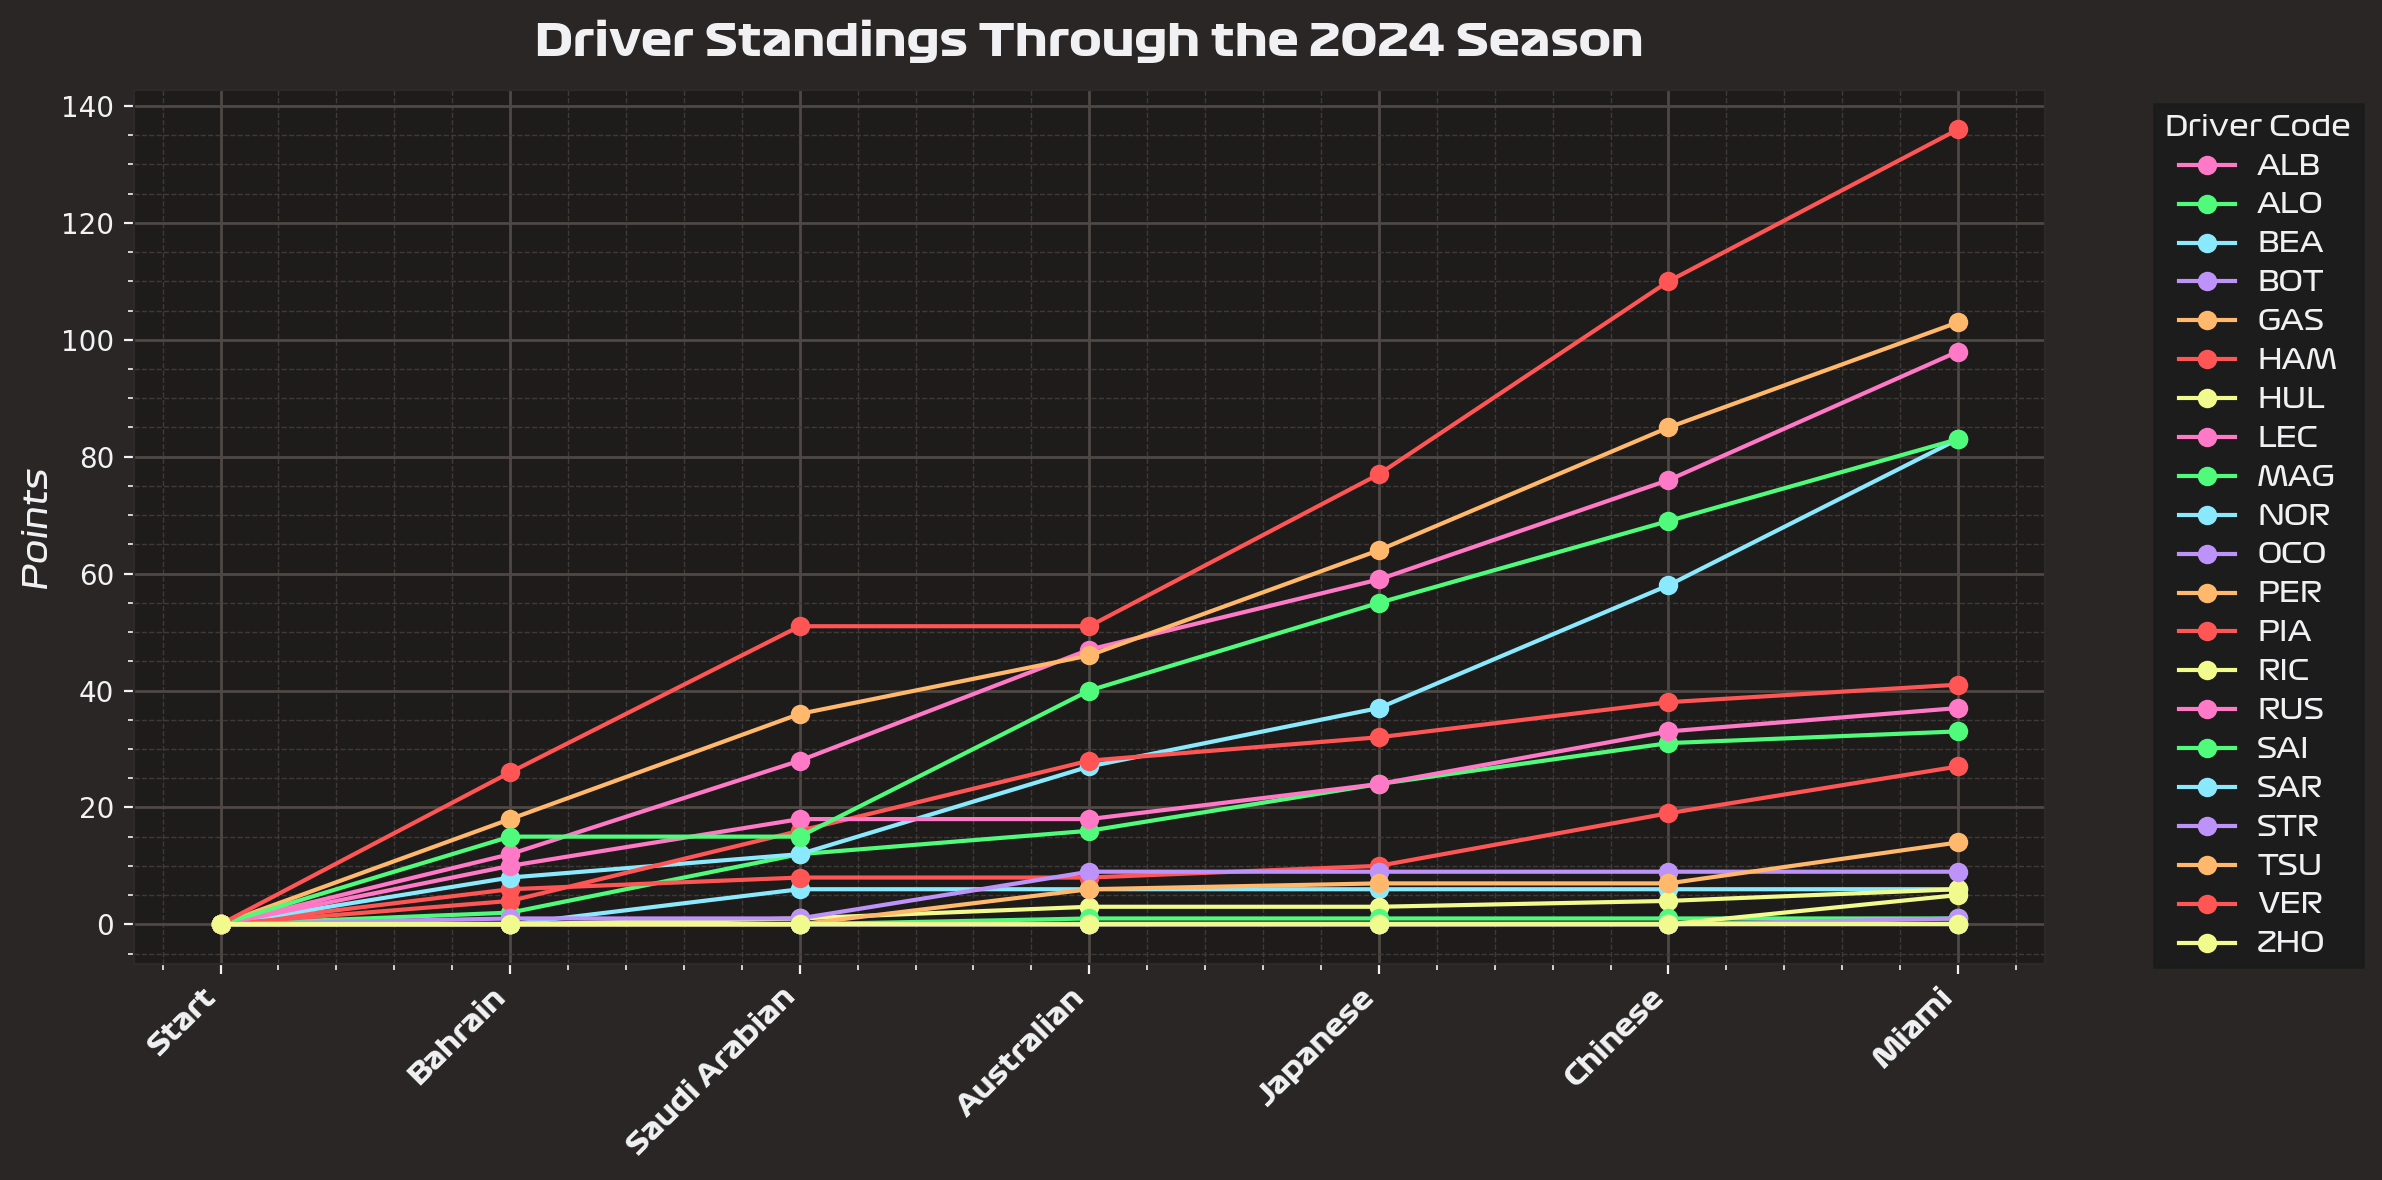

In [11]:
fig, ax = plt.subplots(figsize=(12, 6), dpi = 200 )
for column in new_pivot.columns:
    ax.plot(new_pivot.index, new_pivot[column], marker='o', label=column)

ax.set_xticks(range(len(races)))
ax.set_xticklabels(races, rotation=45, ha='right', font = bold)
ax.set_ylabel('Points', fontsize=12, font = italic)
ax.set_title('Driver Standings Through the 2024 Season', font = bold, fontsize=16)
ax.grid(True)
legend = ax.legend(title='Driver Code', prop = regular, fontsize = 10, bbox_to_anchor=(1.05, 1), loc='upper left')

legend.get_title().set_fontproperties(regular)
legend.get_title().set_fontsize(10)  

plt.tight_layout()
plt.show()

## Plotly example 

In [12]:
special_session  = ff1.get_session(2024, 'China', 'R')
special_session.load(laps = True, telemetry= True, weather= True, messages=True)


core           INFO 	Loading data for Chinese Grand Prix - Race [v3.3.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']


In [13]:
messages = special_session.race_control_messages
messages[messages['Flag'] == 'YELLOW']

Time Category                    Message Status    Flag  \
19 2024-04-21 07:37:40     Flag  YELLOW IN TRACK SECTOR 13   None  YELLOW   
20 2024-04-21 07:38:14     Flag  YELLOW IN TRACK SECTOR 12   None  YELLOW   
29 2024-04-21 07:52:27     Flag   YELLOW IN TRACK SECTOR 7   None  YELLOW   

     Scope  Sector RacingNumber  Lap  
19  Sector    13.0         None   21  
20  Sector    12.0         None   21  
29  Sector     7.0         None   27

In [125]:
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_dark"

In [16]:
traces = []
for column in new_pivot.columns:
    trace = go.Scatter(
        x=[str(x) for x in races],
        y=new_pivot[column],
        mode='markers+lines',
        line=dict(width=2, color=ff1.plotting.driver_color(column)),
        marker=dict(size=8, color=ff1.plotting.driver_color(column)),
        name = column,
        hoverinfo = 'text',
        text=[f"Driver: <b>{column}</b><br>Points: <b>{p}</b><br>Race: <b>{r}</b>" for r, p in zip(races, new_pivot[column])]
    )
    traces.append(trace)

layout = go.Layout(
    title='Driver Standings Through the 2024 Season',
    title_font=dict(size=22),
    xaxis=dict(
        title='Round',
        tickvals=list(range(len(races))),
        ticktext=[str(race) for race in races],
        tickangle=0
    ),
    yaxis=dict(
        title='Points',
    ),
    
    legend=dict(title='Driver Code',),
    margin={'l': 40, 'r': 40, 't': 40, 'b': 40},
    showlegend=True, 
    hovermode = 'closest'
)

fig = go.Figure(data=traces, layout=layout)
fig.update_layout(
    xaxis_fixedrange = True, 
    yaxis_fixedrange = True)
fig.show()


### Color blind 

In [15]:
colorblind_palette = [
    '#377eb8', '#e41a1c', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', '#66c2a5',
    '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#f4a582', '#92c5de', '#d6604d',
    '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#2b83ba'
]

In [16]:
def get_season_results(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)  
    results = []

    for rnd, race in races['raceName'].items():
        race_results = ergast.get_race_results(season=year, round=rnd + 1)
        if race_results.content: 
            temp = race_results.content[0]

            sprint_results = ergast.get_sprint_results(season=year, round=rnd + 1)
            if sprint_results.content and sprint_results.description['round'][0] == rnd + 1:
                temp = pd.merge(temp, sprint_results.content[0], on='driverCode', how='left')
                temp['points'] = temp['points_x'] + temp['points_y']
                temp.drop(columns=['points_x', 'points_y'], inplace=True)

            temp['round'] = rnd + 1
            temp['race'] = race.removesuffix(' Grand Prix')
            temp = temp[['round', 'race', 'driverCode', 'points']]  
            results.append(temp)

    results = pd.concat(results)
    races = results['race'].drop_duplicates()

    pivot = results.pivot_table(index='round', columns='driverCode', values='points', aggfunc='sum').fillna(0).cumsum()
    zero_row = pd.DataFrame(0, index=[0], columns=pivot.columns)
    new_pivot = pd.concat([zero_row, pivot])

    new_pivot.reset_index(drop=True, inplace=True)

    return new_pivot, races


In [17]:
new_pivot, races = get_season_results(2024)

In [108]:
import plotly.graph_objs as go

def create_driver_standings_plot(new_pivot, races):
    traces = []
    for column in new_pivot.columns:
        trace = go.Scatter(
            x=[str(x) for x in races],
            y=new_pivot[column],
            mode='markers+lines',
            line=dict(width=2, color=ff1.plotting.driver_color(column)),
            marker=dict(size=8, color=ff1.plotting.driver_color(column)),
            name=column,
            hoverinfo='text',
            text=[f"Driver: <b>{column}</b><br>Points: <b>{p}</b><br>Race: <b>{r}</b>" for r, p in zip(races, new_pivot[column])]
        )
        traces.append(trace)

    layout = go.Layout(
        title='Driver Standings Through the 2024 Season',
        title_font=dict(size=22),
        xaxis=dict(
            title='Round',
            tickvals=list(range(len(races))),
            ticktext=[str(race) for race in races],
            tickangle=0
        ),
        yaxis=dict(
            title='Points',
        ),
        legend=dict(title='Driver Code',),
        margin={'l': 40, 'r': 40, 't': 40, 'b': 40},
        showlegend=True, 
        hovermode='closest'
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.update_layout(
        xaxis_fixedrange=True, 
        yaxis_fixedrange=True
    )
    return fig


In [19]:
traces = []
for i , column in enumerate(new_pivot.columns):
    color = colorblind_palette[i % len(colorblind_palette)]
    trace = go.Scatter(
        x=[str(x) for x in races],
        y=new_pivot[column],
        mode='markers+lines',
        line=dict(width=2, color = color),
        marker=dict(size=8, color = color),
        name = column,
        hoverinfo = 'text',
        text=[f"Driver: <b>{column}</b><br>Points: <b>{p}</b><br>Race: <b>{r}</b>" for r, p in zip(races, new_pivot[column])]
    )
    traces.append(trace)

layout = go.Layout(
    title='Driver Standings Through the 2024 Season',
    title_font=dict(size=22),
    xaxis=dict(
        title='Round',
        tickvals=list(range(len(races))),
        ticktext=[str(race) for race in races],
        tickangle=0
    ),
    yaxis=dict(
        title='Points',
    ),
    
    legend=dict(title='Driver Code',),
    margin={'l': 40, 'r': 40, 't': 40, 'b': 40},
    showlegend=True, 
    hovermode = 'closest'
)

fig = go.Figure(data=traces, layout=layout)
fig.update_layout(
    xaxis_fixedrange = True, 
    yaxis_fixedrange = True)
fig.show()

In [24]:
import pandas as pd
import plotly.express as px
from plotly.io import show
import datetime
from fastf1.ergast import Ergast

In [21]:
ergast = Ergast()
races = ergast.get_race_schedule(2024) 
results = []

In [22]:
resu = ergast.get_race_results(season=2024, round=3 )

In [138]:
import datetime
import pandas as pd
import plotly.express as px
from plotly.io import show
from fastf1.ergast import Ergast


In [25]:
ergast = Ergast()
today = datetime.date.today()
races = ergast.get_race_schedule(2024)

In [26]:
results = []
for rnd, row in races.iterrows():
    race_date = row['raceDate'].date()
    if race_date <= today:
        temp = ergast.get_race_results(season=2024, round=rnd)
        if temp.content:
            temp = temp.content[0]

            sprint = ergast.get_sprint_results(season=2024, round=rnd)
            if sprint.content and sprint.description['round'][0] == rnd:
                temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
                temp['points'] = temp['points_x'] + temp['points_y']
                temp.drop(columns=['points_x', 'points_y'], inplace=True)

        temp['round'] = rnd
        temp['race'] = row['raceName'].removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'driverCode', 'points']]  
        results.append(temp)

results = pd.concat(results, ignore_index=True)
races_list = results['race'].drop_duplicates()  


In [27]:
results = results.pivot(index='driverCode', columns='round', values='points')

In [28]:
results.columns = races_list

In [29]:
results['total_points'] = results.sum(axis = 1)

In [30]:
results = results.sort_values(by='total_points', ascending=False)
results.drop(columns='total_points', inplace=True)

In [31]:
results.fillna(0,  inplace = True)

In [32]:
fig = px.imshow(
    results,
    text_auto=True,
    aspect='auto',  
color_continuous_scale=[
    [0,    'rgb(247, 252, 285)'], 
    [0.25, 'rgb(199, 223, 192)'], 
    [0.5,  'rgb(216, 196, 143)'], 
    [0.75, 'rgb(35, 139, 69)'],   
    [1,    'rgb(0, 187, 36)']     
],
    labels={'x': 'Race',
            'y': 'Driver',
            'color': 'Points'}     
)
fig.update_xaxes(title_text='')      
fig.update_yaxes(title_text='')
fig.update_yaxes(tickmode='linear')  
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
                 showline=False,
                 tickson='boundaries')              
fig.update_xaxes(showgrid=False, showline=False)    
fig.update_layout(coloraxis_showscale=False)        
fig.update_layout(xaxis=dict(side='top'))           
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))  
fig.update_layout(
    xaxis_fixedrange=True,
    yaxis_fixedrange=True  )
show(fig)


In [33]:
def heatmap_result_plot():
    ergast = Ergast()
    today = datetime.date.today()
    races = ergast.get_race_schedule(2024)

    results = []
    for rnd, row in races.iterrows():
        race_date = row['raceDate'].date()
        if race_date <= today:
            temp = ergast.get_race_results(season=2024, round=rnd)
            if temp.content:
                temp = temp.content[0]

                sprint = ergast.get_sprint_results(season=2024, round=rnd)
                if sprint.content and sprint.description['round'][0] == rnd:
                    temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
                    temp['points'] = temp['points_x'] + temp['points_y']
                    temp.drop(columns=['points_x', 'points_y'], inplace=True)

            temp['round'] = rnd
            temp['race'] = row['raceName'].removesuffix(' Grand Prix')
            temp = temp[['round', 'race', 'driverCode', 'points']]  
            results.append(temp)

    results = pd.concat(results, ignore_index=True)
    races_list = results['race'].drop_duplicates()  

    results = results.pivot(index='driverCode', columns='round', values='points')

    results.columns = races_list

    results['total_points'] = results.sum(axis=1)

    results = results.sort_values(by='total_points', ascending=False)
    results.drop(columns='total_points', inplace=True)

    results.fillna(0, inplace=True)
    
    fig = px.imshow(
        results,
        text_auto=True,
        aspect='auto',
        color_continuous_scale=[
            [0,    'rgb(202, 240, 248)'],
            [0.25, 'rgb(144, 224, 239)'],
            [0.5,  'rgb(0, 180, 216)'],
            [0.75, 'rgb(0, 150, 199)'],
            [1,    'rgb(2, 62, 138)']
        ],
        labels={'x': 'Race',
                'y': 'Driver',
                'color': 'Points'}
    )
    fig.update_xaxes(title_text='')
    fig.update_yaxes(title_text='')
    fig.update_yaxes(tickmode='linear')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
                     showline=False,
                     tickson='boundaries')
    fig.update_xaxes(showgrid=False, showline=False)
    fig.update_layout(coloraxis_showscale=False)
    fig.update_layout(xaxis=dict(side='top'))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.update_layout(
        xaxis_fixedrange=True,
        yaxis_fixedrange=True
    )
    show(fig)

heatmap_result_plot()


In [34]:
driver_laps = laps.groupby('Driver').agg({'LapTime': list, 'Position':'first'})

In [35]:
driver_laps = driver_laps.sort_values('Position')



In [36]:
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [37]:
def flatten_driver_data(driver_data):
    """
    Flattens a DataFrame containing lists of lap times and lap numbers for each driver.
    
    Parameters:
        driver_data (pd.DataFrame): DataFrame grouped by 'Driver' with columns for 'LapTime' and 'LapNumber' as lists.
    
    Returns:
        list: A list of tuples, where each tuple contains ('Driver', 'LapTime', 'LapNumber').
    """
    flat_data = [(driver, lap_time, lap_number) 
                 for driver, (lap_times, lap_numbers) 
                 in driver_data[['LapTime', 'LapNumber']].iterrows()
                 for lap_time, lap_number in zip(lap_times, lap_numbers)]
    return flat_data


In [38]:

driver_data = laps.groupby('Driver').agg({'LapTime': list, 'LapNumber': list, 'Position': 'first'})
driver_data = driver_data.sort_values('Position')
driver_data['LapTime'] = driver_data['LapTime'].apply(lambda x: [t.total_seconds() for t in x])


flat_data = flatten_driver_data(driver_data)
plot_data = pd.DataFrame(flat_data, columns=['Driver', 'LapTime', 'LapNumber'])

fig = px.line(plot_data, x='LapNumber', y='LapTime', color='Driver', markers=True, title='Driver Lap Times over Laps')
fig.update_yaxes(range=[80, 100])
fig.show()

In [39]:

fig = px.line(plot_data, x='LapNumber', y='LapTime', color='Driver', markers=True, title='Driver Lap Times over Laps')
fig.update_yaxes(type='log', range=[1.9001, 2.001])
fig.update_xaxes(type = 'log', range = [.0,1.8])
fig.show()

In [40]:
laps_list = laps['LapNumber'].unique()

In [41]:
first_lap = laps[laps['LapNumber'] == laps_list[0]]
second_last_lap = laps[laps['LapNumber'] == laps_list[-2]]
last_lap = laps[laps['LapNumber'] == laps_list[-1]]

In [42]:
drivers_in_last_lap = last_lap['Driver'].unique()
second_last_lap_filtered = second_last_lap[~second_last_lap['Driver'].isin(drivers_in_last_lap)]


In [43]:
last_laps = pd.concat([second_last_lap_filtered, last_lap], ignore_index=True)

In [44]:

first_laps = first_lap[['Driver', 'Position']]
last_laps = last_lap[['Driver', 'Position']]


fist_last = pd.merge(first_laps, last_laps, on= 'Driver',suffixes=('_FirstLap', '_LastLap'))


In [45]:
second_last_lap = laps[laps['LapNumber'] == laps_list[-2]]
last_lap = laps[laps['LapNumber'] == laps_list[-1]]

In [46]:
drivers_in_last_lap = last_lap['Driver'].unique()

In [47]:
second_last_lap_filtered = second_last_lap[~second_last_lap['Driver'].isin(drivers_in_last_lap)]


In [48]:
final_result = pd.concat([second_last_lap_filtered, last_lap], ignore_index=True)


In [49]:


first_laps = first_lap[['Driver', 'Position']]
last_laps = final_result[['Driver', 'Position']]


fist_last = pd.merge(first_laps, last_laps, on= 'Driver',suffixes=('_FirstLap', '_LastLap'))
fist_last

Driver  Position_FirstLap  Position_LastLap
0     GAS               17.0              13.0
1     PER                7.0               5.0
2     ALO               11.0               6.0
3     LEC                4.0               2.0
4     STR                8.0               7.0
5     MAG               13.0              10.0
6     TSU                9.0               8.0
7     ALB               14.0              11.0
8     ZHO               19.0              15.0
9     HUL               16.0               9.0
10    RIC               18.0              12.0
11    OCO               15.0              16.0
12    NOR                3.0               3.0
13    SAI                2.0               1.0
14    RUS                6.0               NaN
15    BOT               12.0              14.0
16    PIA                5.0               4.0

In [50]:
fist_last['gained_lost'] = fist_last['Position_FirstLap'] - fist_last['Position_LastLap']

In [51]:
fist_last = fist_last.dropna()

In [52]:
fist_last = fist_last.sort_values('gained_lost',ascending = False)

In [53]:
# first_last = pd.concat([fist_last.head(5), fist_last.tail(5)])



In [54]:
fig = px.bar(fist_last, x='gained_lost', y='Driver', orientation='h', 
             text='gained_lost', title="Places Gained or Lost by Drivers")
fig.update_traces(hovertemplate='Driver: <b>%{y}</b>')
fig.update_layout(
    xaxis_title="Places Gained (+) / Places Lost (-)",
    yaxis_title="Driver",
    yaxis=dict(
        autorange='reversed' ,
        fixedrange=True
    ),
    
    xaxis=dict(
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='Gray',
        fixedrange=True
    ),
    barmode='relative',
    bargap=.10,
    dragmode=False, 
    width = 800,
    height = 600
)


fig.show()

In [192]:
ergast.get_constructor_standings(2024).content[0]

position positionText  points  wins constructorId  \
0         1            1   239.0     4      red_bull   
1         2            2   187.0     1       ferrari   
2         3            3   124.0     1       mclaren   
3         4            4    64.0     0      mercedes   
4         5            5    42.0     0  aston_martin   
5         6            6    19.0     0            rb   
6         7            7     7.0     0          haas   
7         8            8     1.0     0        alpine   
8         9            9     0.0     0      williams   
9        10           10     0.0     0        sauber   

                                      constructorUrl constructorName  \
0       http://en.wikipedia.org/wiki/Red_Bull_Racing        Red Bull   
1      http://en.wikipedia.org/wiki/Scuderia_Ferrari         Ferrari   
2               http://en.wikipedia.org/wiki/McLaren         McLaren   
3  http://en.wikipedia.org/wiki/Mercedes-Benz_in_...        Mercedes   
4  http://en.wikipedia.org/wiki/Aston_Martin_in_F...    Aston Martin   
5   http://en.wikipedia.org/wiki/RB_Formula_One_Team      RB F1 Team   
6          http://en.wikipedia.org/wiki/Haas_F1_Team    Haas F1 Team   
7        http://en.wikipedia.org/wiki/Alpine_F1_Team  Alpine F1 Team   
8  http://en.wikipedia.org/wiki/Williams_Grand_Pr...        Williams   
9     http://en.wikipedia.org/wiki/Sauber_Motorsport          Sauber   

  constructorNationality  
0               Austrian  
1                Italian  
2                British  
3                 German  
4                British  
5                Italian  
6               American  
7                 French  
8                British  
9                  Swiss

In [188]:
def get_constructor_season_results(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)
    results = []

    for rnd, race in races['raceName'].items():
        constructor_results = ergast.get_constructor_standings(season=year, round=rnd + 1)
        if constructor_results.content:
            temp = constructor_results.content[0]

            temp['round'] = rnd + 1
            temp['race'] = race.removesuffix(' Grand Prix')
            temp = temp[['round', 'race', 'constructorName', 'points']]
            results.append(temp)

    results = pd.concat(results)
    races = results['race'].drop_duplicates()

    pivot = results.pivot_table(index='round', columns='constructorName', values='points', aggfunc='sum').fillna(0).cumsum()

    name_change = {
        'alpine': 'Alpine F1 Team',
        'aston_martin': 'Aston Martin',
        'ferrari': 'Ferrari',
        'haas': 'Haas F1 Team',
        'mclaren': 'McLaren',
        'mercedes': 'Mercedes',
        'rb': 'RB F1 Team',
        'red_bull': 'Red Bull',
        'sauber': 'Sauber',
        'williams': 'Williams'
    }

    pivot.rename(columns=name_change, inplace=True)

    zero_row = pd.DataFrame(0, index=[0], columns=pivot.columns)
    new_pivot = pd.concat([zero_row, pivot])

    new_pivot.reset_index(drop=True, inplace=True)

    return new_pivot, races

new_pivot_constructor, races_constructor = get_constructor_season_results(2024)


In [193]:
new_pivot_constructor, races_constructor = get_constructor_season_results(2024)

def constructors_standings(new_pivot, races):
    traces = []
    for column in new_pivot.columns:
        try:
            color = fastf1.plotting.team_color(column) 
        except KeyError:
            color = '#1634cb' # specially for VCARB due to name inconstencies in Team Color and constructor Names  
        trace = go.Scatter(
            x=[str(x) for x in races],
            y=new_pivot[column],
            mode='markers+lines',
            line=dict(width=2, color=color),
            marker=dict(size=8, color=color),
            name=column,
            hoverinfo='text',
            text=[f"Constructor: <b>{column}</b><br>Points: <b>{p}</b><br>Race: <b>{r}</b>" for r, p in zip(races, new_pivot[column])]
        )
        traces.append(trace)

    layout = go.Layout(
        title='Constructor Standings Through the 2024 Season',
        title_font=dict(size=22),
        xaxis=dict(
            title='Round',
            tickvals=list(range(len(races))),
            ticktext=[str(race) for race in races],
            tickangle=0
        ),
        yaxis=dict(
            title='Points',
        ),
        legend=dict(title='Constructor ID',),
        margin={'l': 40, 'r': 40, 't': 40, 'b': 40},
        showlegend=True, 
        hovermode='closest'
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.update_layout(
        xaxis_fixedrange=True, 
        yaxis_fixedrange=True
    )
    return fig


In [194]:
constructors_standings(new_pivot_constructor, races_constructor)

## Bokeh example 

In [55]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, WheelZoomTool, ResetTool, Legend
from bokeh.layouts import column
from bokeh.io import show

output_notebook(hide_banner = True)

In [173]:
data = {
    'rounds': [str(x) for x in races] 
}

for column in new_pivot.columns:
    data[column] = new_pivot[column].tolist()

source = ColumnDataSource(data=data)

driver_colors = {driver: ff1.plotting.driver_color(driver) for driver in new_pivot.columns}

p = figure(x_range=data['rounds'], width=800, height=400, title='Driver Standings Through the 2024 Season',
           tools=[HoverTool(), WheelZoomTool(), ResetTool()],)

hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Round", "@rounds"),
    ("Driver", "$name"),  
    ("Points", "@$name")  
]

p.title.text_font = "arial"
p.xaxis.axis_label_text_font = "arial"
p.yaxis.axis_label_text_font = "arial"

p.title.text_font_size = '22pt'

for driver in new_pivot.columns:
    p.line('rounds', driver, source=source, line_width=2, color=driver_colors[driver])
    p.scatter('rounds', driver, source=source,  marker='circle', size=8, fill_color=driver_colors[driver], name=driver)

p.xaxis.axis_label = 'Round'
p.yaxis.axis_label = 'Points'
p.axis.axis_label_text_font_style = 'bold'
p.axis.major_label_orientation = "horizontal"
p.grid.grid_line_alpha = 0.3

p.legend.location = "top_left"
p.legend.title = 'Driver Code'

show(p)


KeyError: 

# Drivers Result 

In [57]:
def plot_positions(session):
    fig, ax = plt.subplots(figsize=(12, 5), dpi=300)
    
    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty:
            continue  # Skip drivers with no laps

        abb = drv_laps['Driver'].iloc[0]
        color = ff1.plotting.driver_color(abb)
        ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, color=color)

    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty or np.isnan(drv_laps['Position'].iloc[0]):
            continue
        
        abb = drv_laps['Driver'].iloc[0]
        starting_position = int(drv_laps['Position'].iloc[0])
        ax.text(0.8, starting_position, f"P{starting_position}: {abb}", color='w', ha='right', font = regular)

    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty:
            continue
        
        abb = drv_laps['Driver'].iloc[0]
        final_position = drv_laps['Position'].iloc[-1]
        starting_position = int(drv_laps['Position'].iloc[0])
        if np.isnan(final_position) or np.isnan(starting_position):
            continue
        
        places_gained = int(starting_position - final_position)
        places_text = f"({'+' if places_gained > 0 else '' if places_gained == 0 else '-'}{abs(places_gained)})"
        ax.text(57, final_position, f"P{starting_position}:{abb} {places_text}", color='w', ha='left', font = regular)

    ax.annotate('Starting Position', xy=(-0.14, 0.4), xycoords='axes fraction',font = italic, fontsize=14, color='w', rotation=90)
    ax.annotate('Finishing Position', xy=(+1.14, 0.4), xycoords='axes fraction',font = italic, fontsize=14, color='w', rotation=-90)
    ax.set_ylim([20.5, 0.5])
    ax.set_yticks([])
    ax.set_xlabel('Lap', fontsize=14, font = italic)
    ax.set_xlim([1, 57])
    plt.title(f'{session}', font=bold ,  fontsize=24, y=1.08)
    plt.tight_layout()
    plt.show()



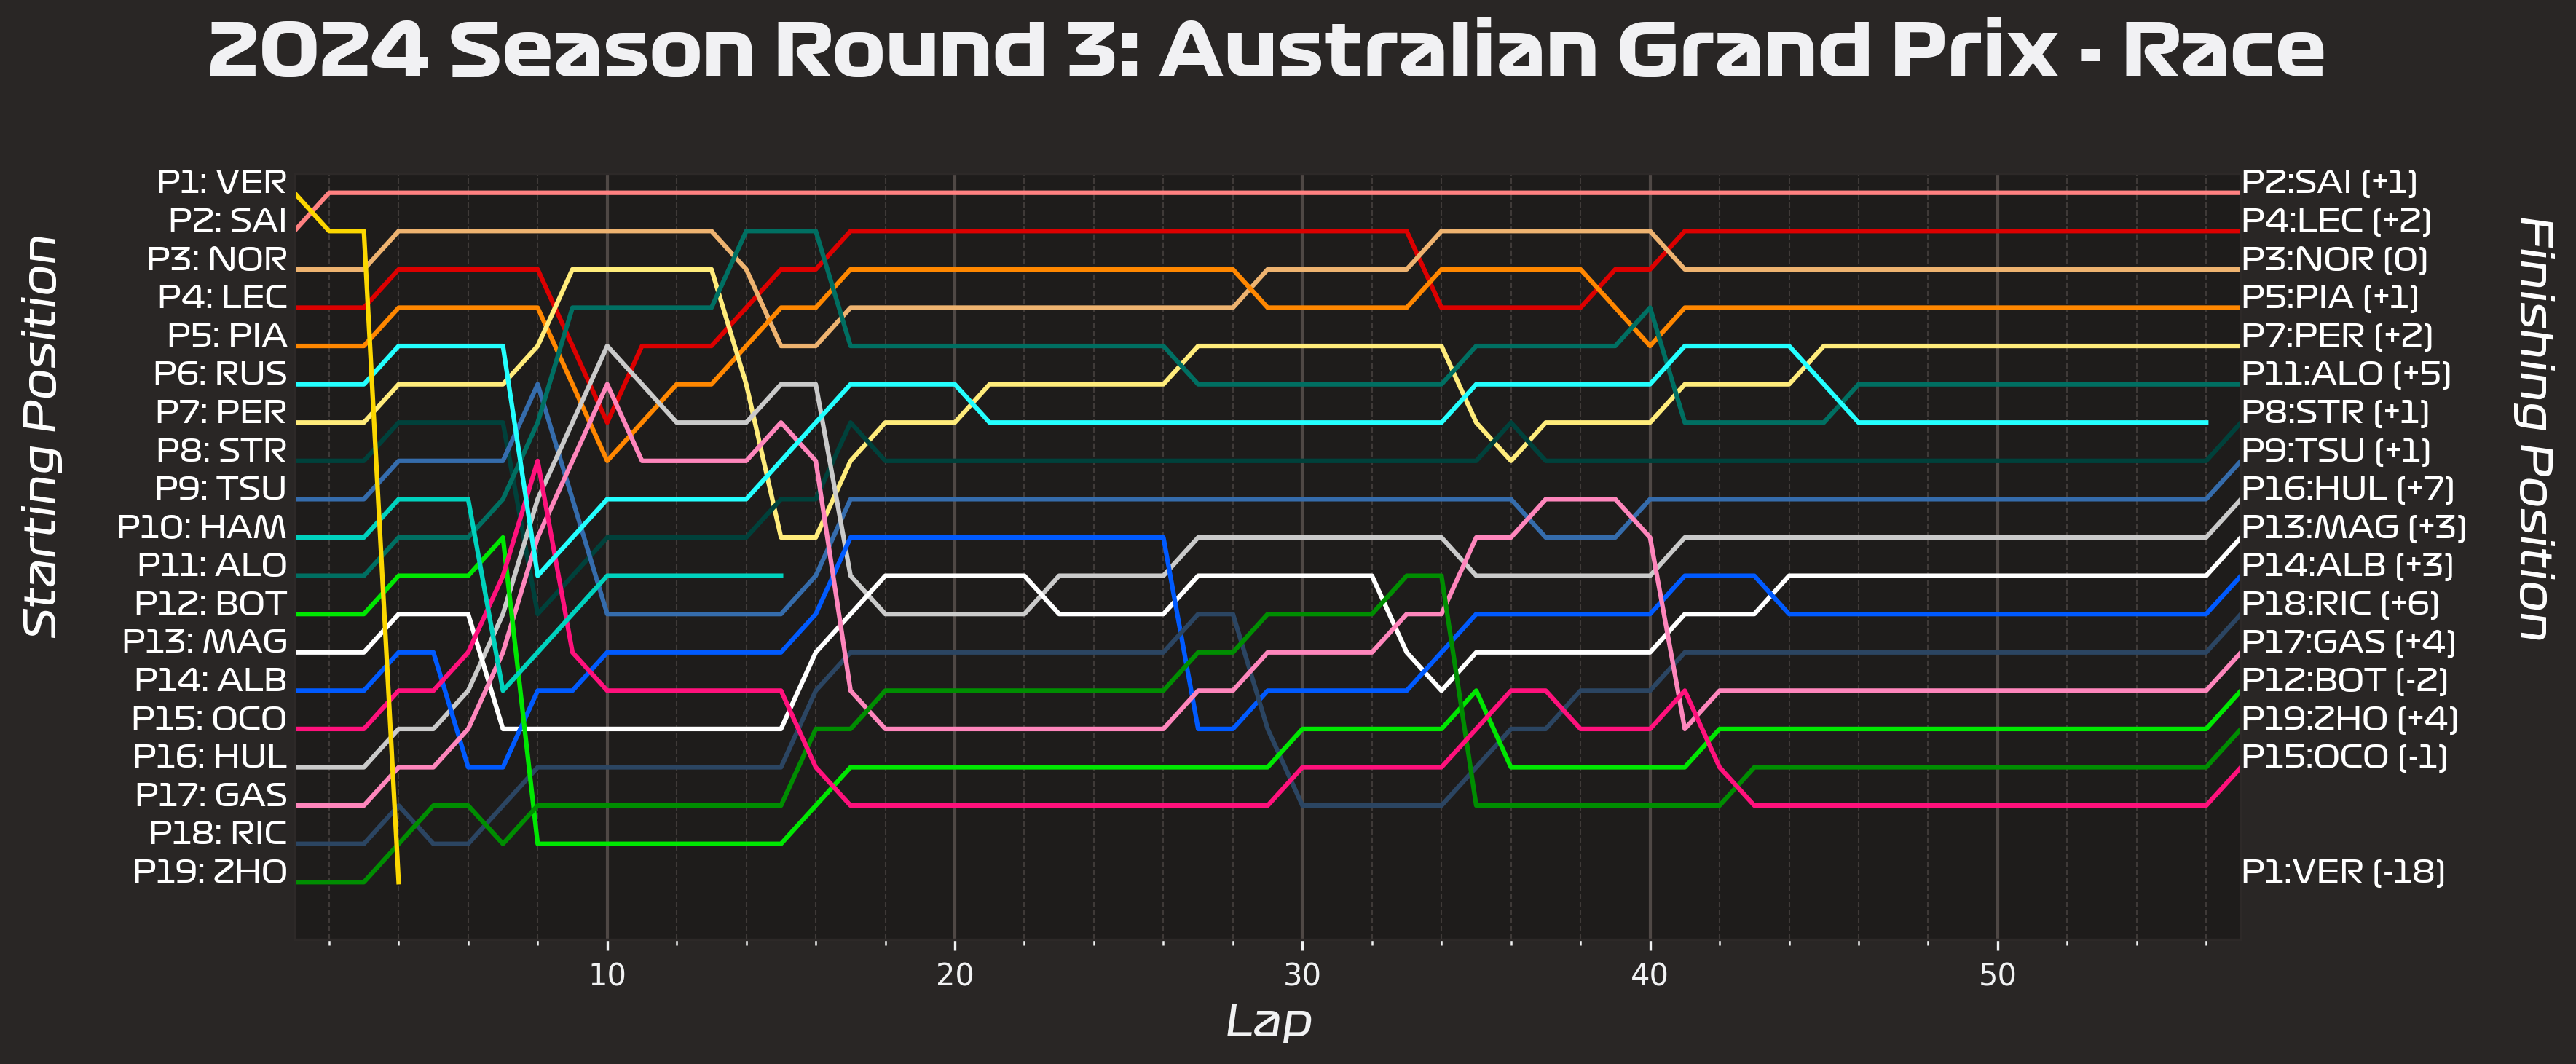

In [58]:
plot_positions(session)

# Team Mates Tyre usage dComparison 

In [59]:
lec = session.laps.pick_driver("LEC").pick_quicklaps().reset_index()
sai = session.laps.pick_driver("SAI").pick_quicklaps().reset_index()
lec_tel = lec.pick_fastest().get_car_data().add_distance()
sai_tel = sai.pick_fastest().get_car_data().add_distance()

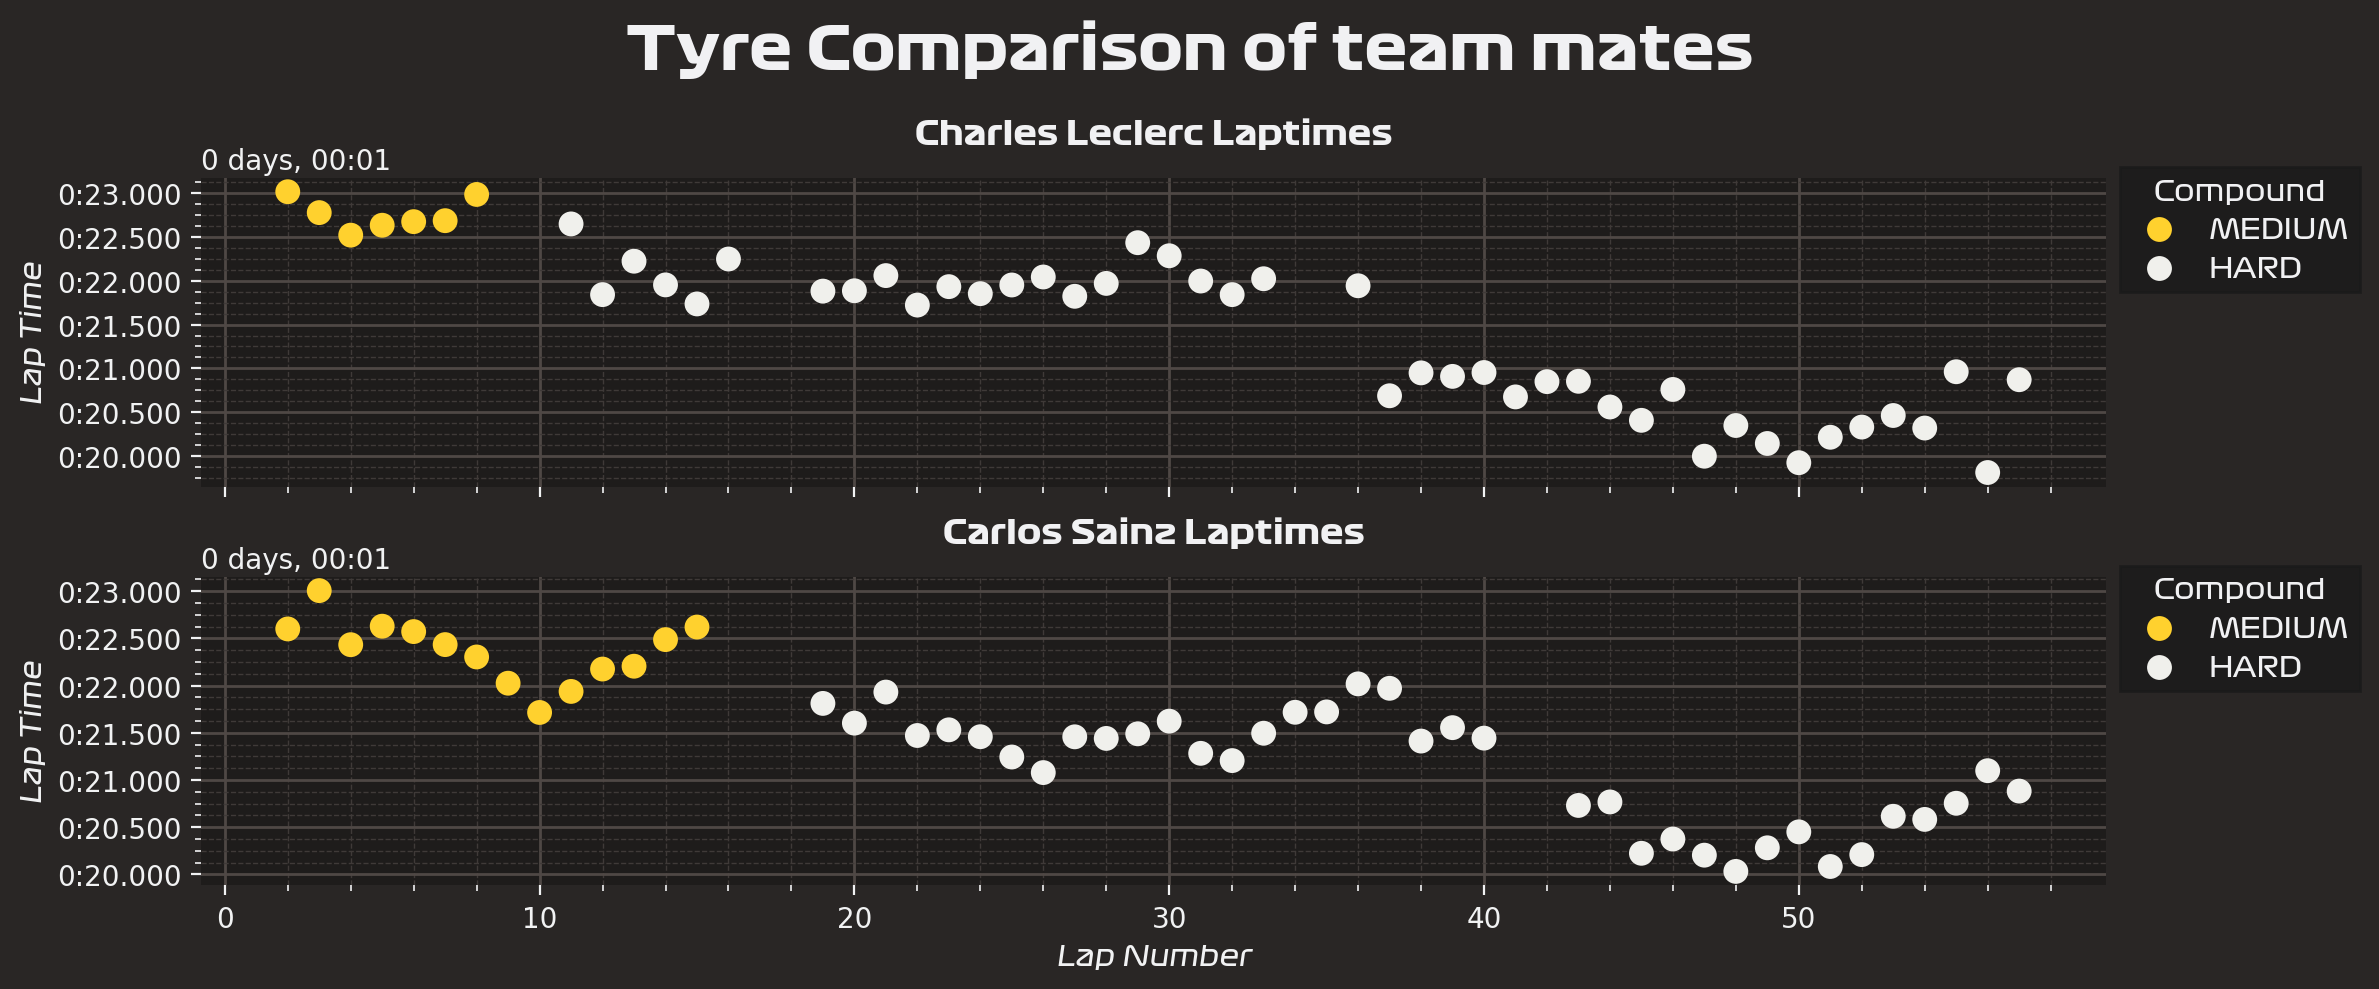

In [60]:
fig, (ax1,ax2)= plt.subplots(2,1,figsize=(12, 5), dpi = 200, sharex= True)
sns.scatterplot(data=lec,
                x="LapNumber",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0)

ax1.set_ylabel("Lap Time", font = italic)

ax1.invert_yaxis()
ax1.set_title("Charles Leclerc Laptimes", font = bold, fontsize = 12)
handles, labels = ax1.get_legend_handles_labels()

legend = ax1.legend(handles=handles, prop = regular, labels=labels, title="Compound", loc="upper left",  bbox_to_anchor=(1, 1.078))
legend.get_title().set_fontproperties(regular)
legend.get_title().set_fontsize(10)  

sns.scatterplot(data=sai,
                x="LapNumber",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0)

ax2.set_xlabel("Lap Number", font = italic)
ax2.set_ylabel("Lap Time", font = italic)
ax2.invert_yaxis()
ax2.set_title("Carlos Sainz Laptimes", font = bold, fontsize  = 12 )
handles, labels = ax2.get_legend_handles_labels()

legend = ax2.legend(handles=handles, prop = regular, labels=labels, title="Compound", loc="upper left",  bbox_to_anchor=(1, 1.078))
legend.get_title().set_fontproperties(regular)
legend.get_title().set_fontsize(10)


sns.despine(left=True, bottom=True)
# plt.subplots_adjust(hspace=5) 
plt.suptitle('Tyre Comparison of team mates', font= bold, fontsize = 22)
plt.tight_layout()
plt.show()


In [61]:
def plot_driver_laptimes(session, driver1, driver2):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5), dpi=200)

    # Driver 1 lap times
    driver1_laps = session.laps.pick_driver(driver1).pick_quicklaps().reset_index()
    sns.scatterplot(data=driver1_laps,
                    x="LapNumber",
                    y="LapTime",
                    ax=ax1,
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0)
    ax1.set_ylabel("Lap Time")
    ax1.invert_yaxis()
    ax1.set_title(f"{driver1} Laptimes")
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles=handles, labels=labels, title="Compound", loc="upper left", bbox_to_anchor=(1, 1.078))

    # Driver 2 lap times
    driver2_laps = session.laps.pick_driver(driver2).pick_quicklaps().reset_index()
    sns.scatterplot(data=driver2_laps,
                    x="LapNumber",
                    y="LapTime",
                    ax=ax2,
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0)
    ax2.set_xlabel("Lap Number")
    ax2.set_ylabel("Lap Time")
    ax2.invert_yaxis()
    ax2.set_title(f"{driver2} Laptimes")
    handles, labels = ax2.get_legend_handles_labels()
    ax2.legend(handles=handles, labels=labels, title="Compound", loc="upper left", bbox_to_anchor=(1, 1.078))

    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# plot_driver_laptimes(session, 'LEC', 'SAI')


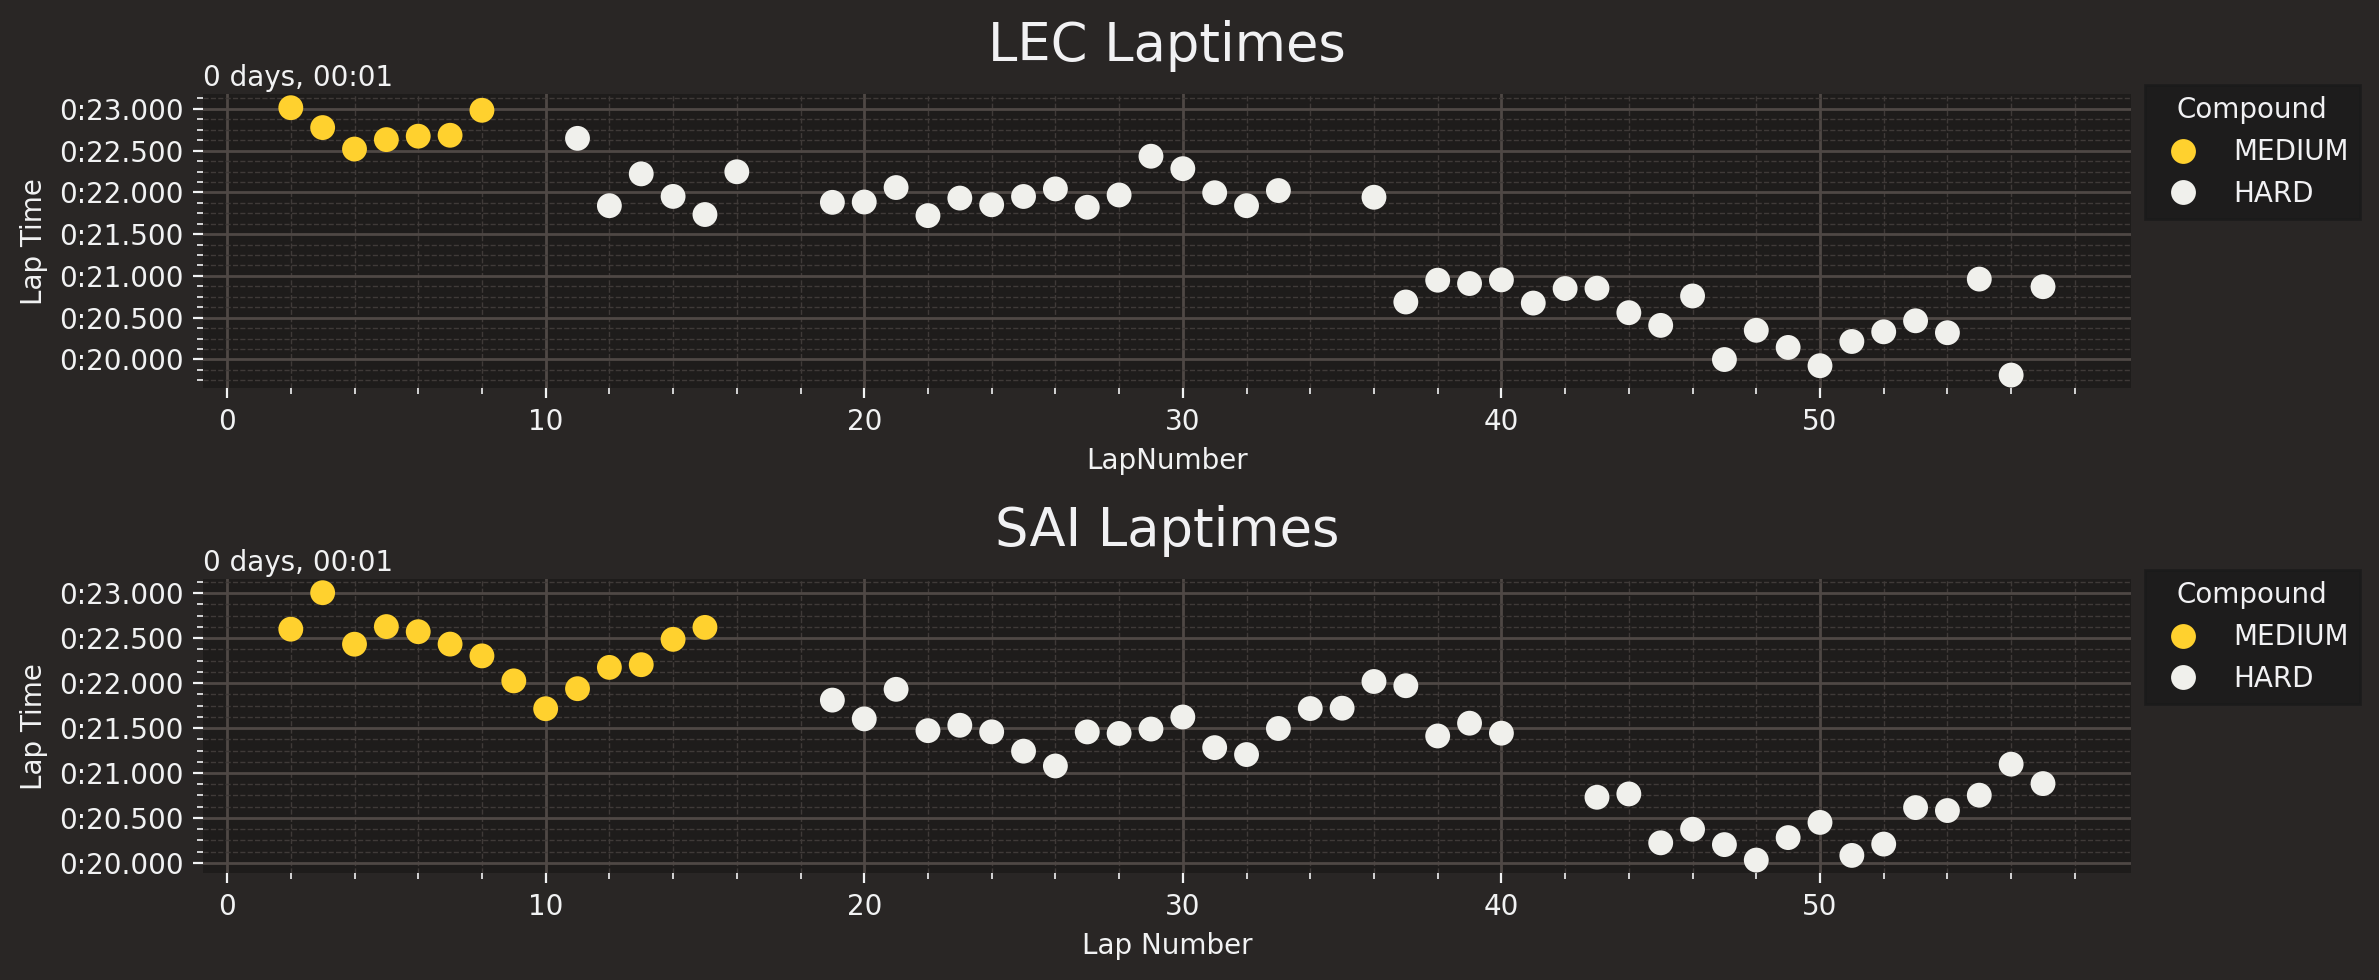

In [62]:
plot_driver_laptimes(session, 'LEC', 'SAI')

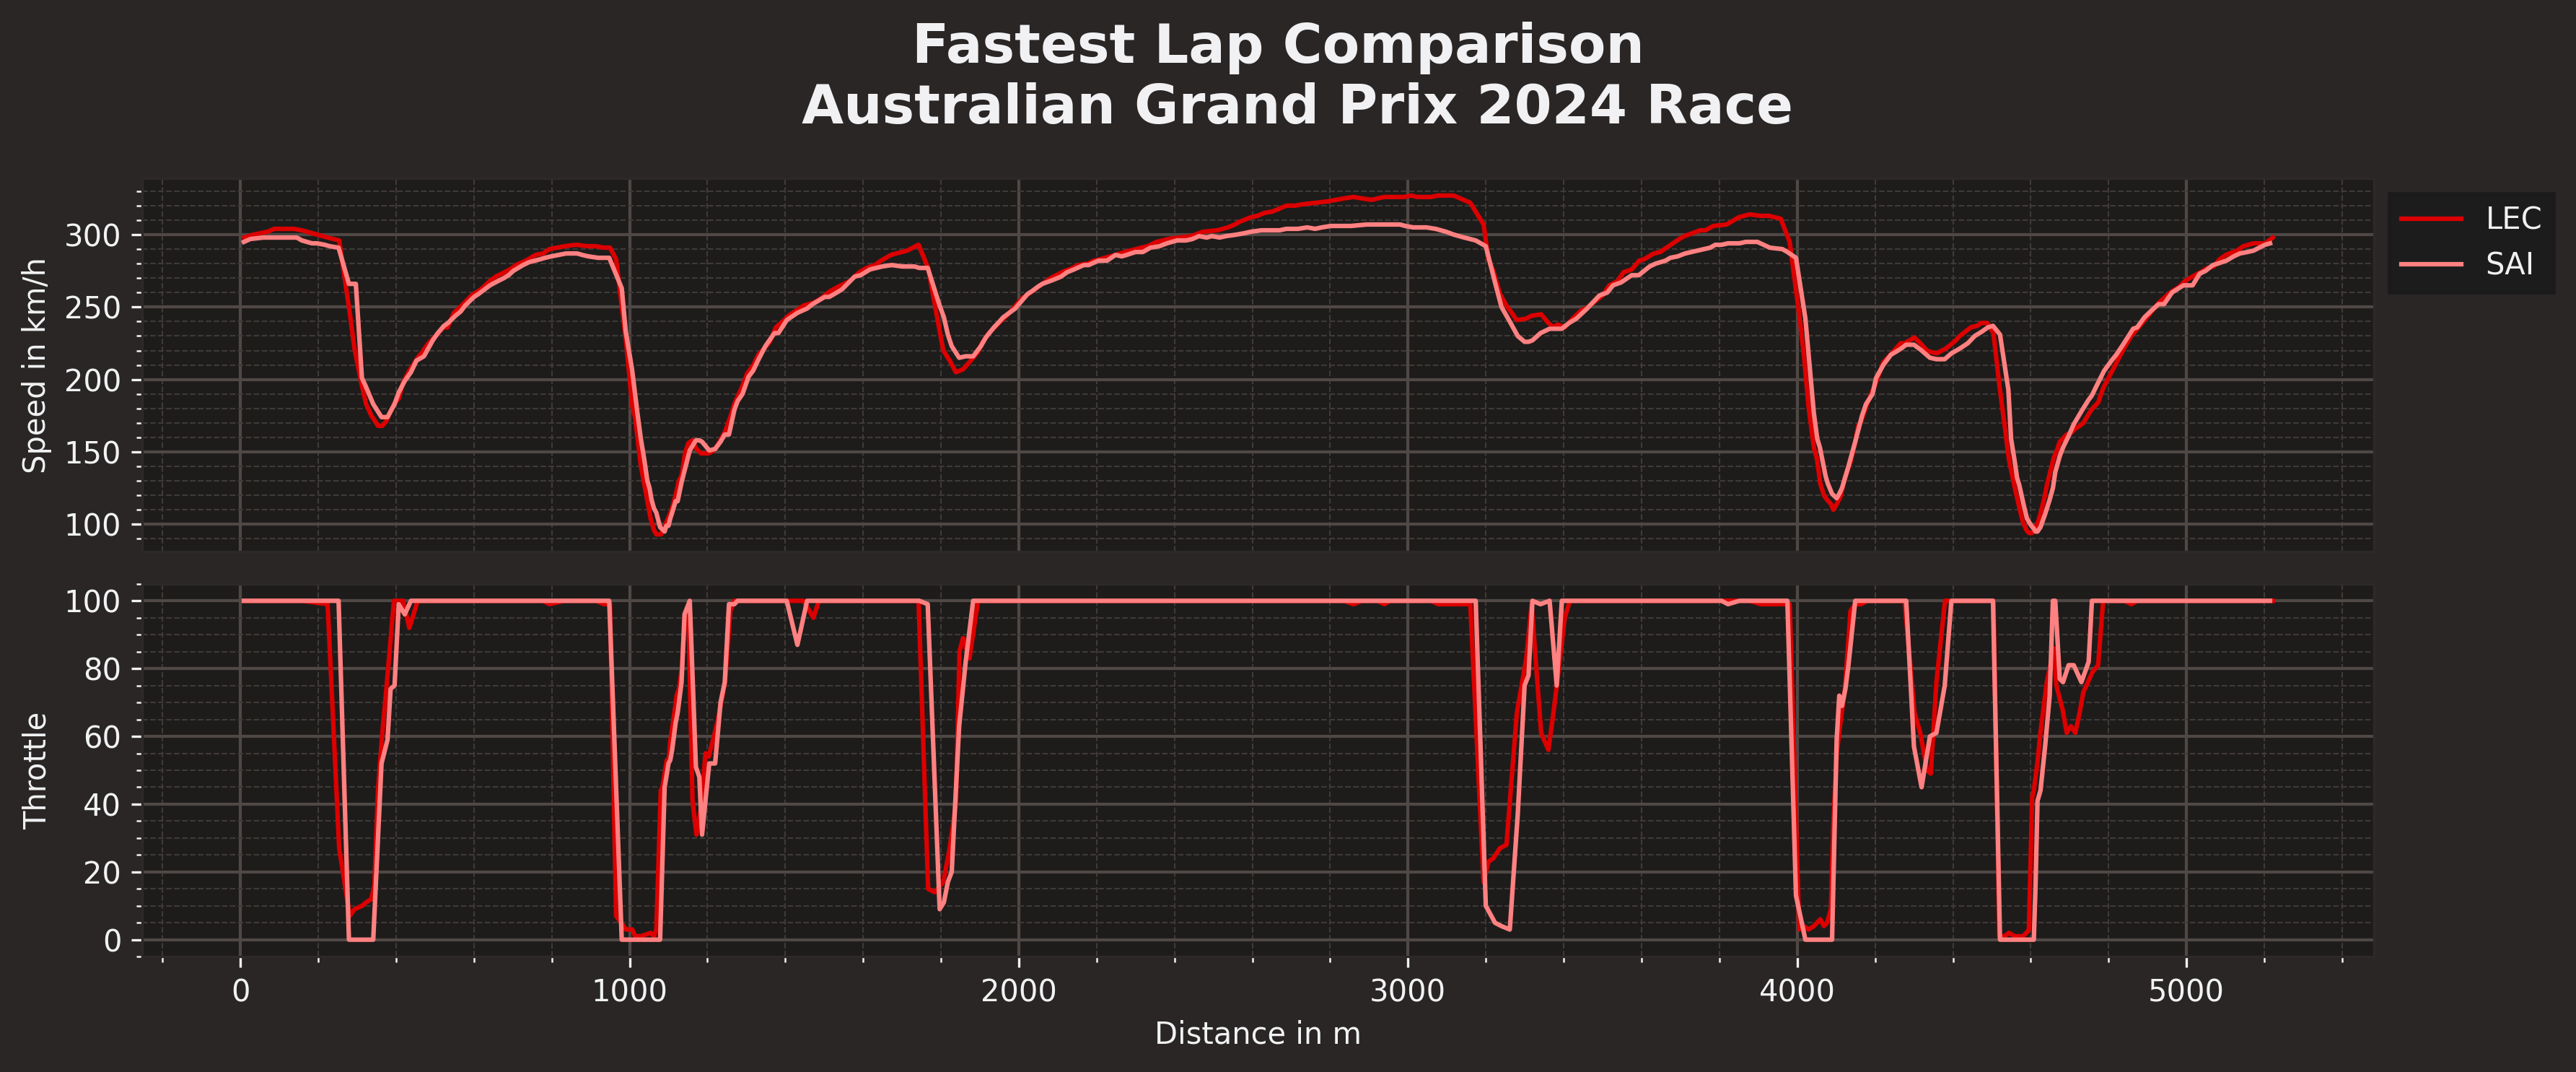

In [63]:
lec_col = ff1.plotting.driver_color('LEC')
sai_col = ff1.plotting.driver_color('SAI')

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,5), dpi = 300)
ax1.plot(lec_tel['Distance'], lec_tel['Speed'], color=lec_col, label='LEC')
ax1.plot(sai_tel['Distance'], sai_tel['Speed'], color=sai_col, label='SAI')

ax1.tick_params(
    axis='x',          
    which='both',     
    bottom=False,      
    top=False,        
    labelbottom=False)


ax2.plot(lec_tel['Distance'], lec_tel['Throttle'],color = lec_col)
ax2.plot(sai_tel['Distance'], sai_tel['Throttle'],color = sai_col)

ax1.set_ylabel('Speed in km/h')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_xlabel('Distance in m')
ax2.set_ylabel('Throttle')

plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Race", fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

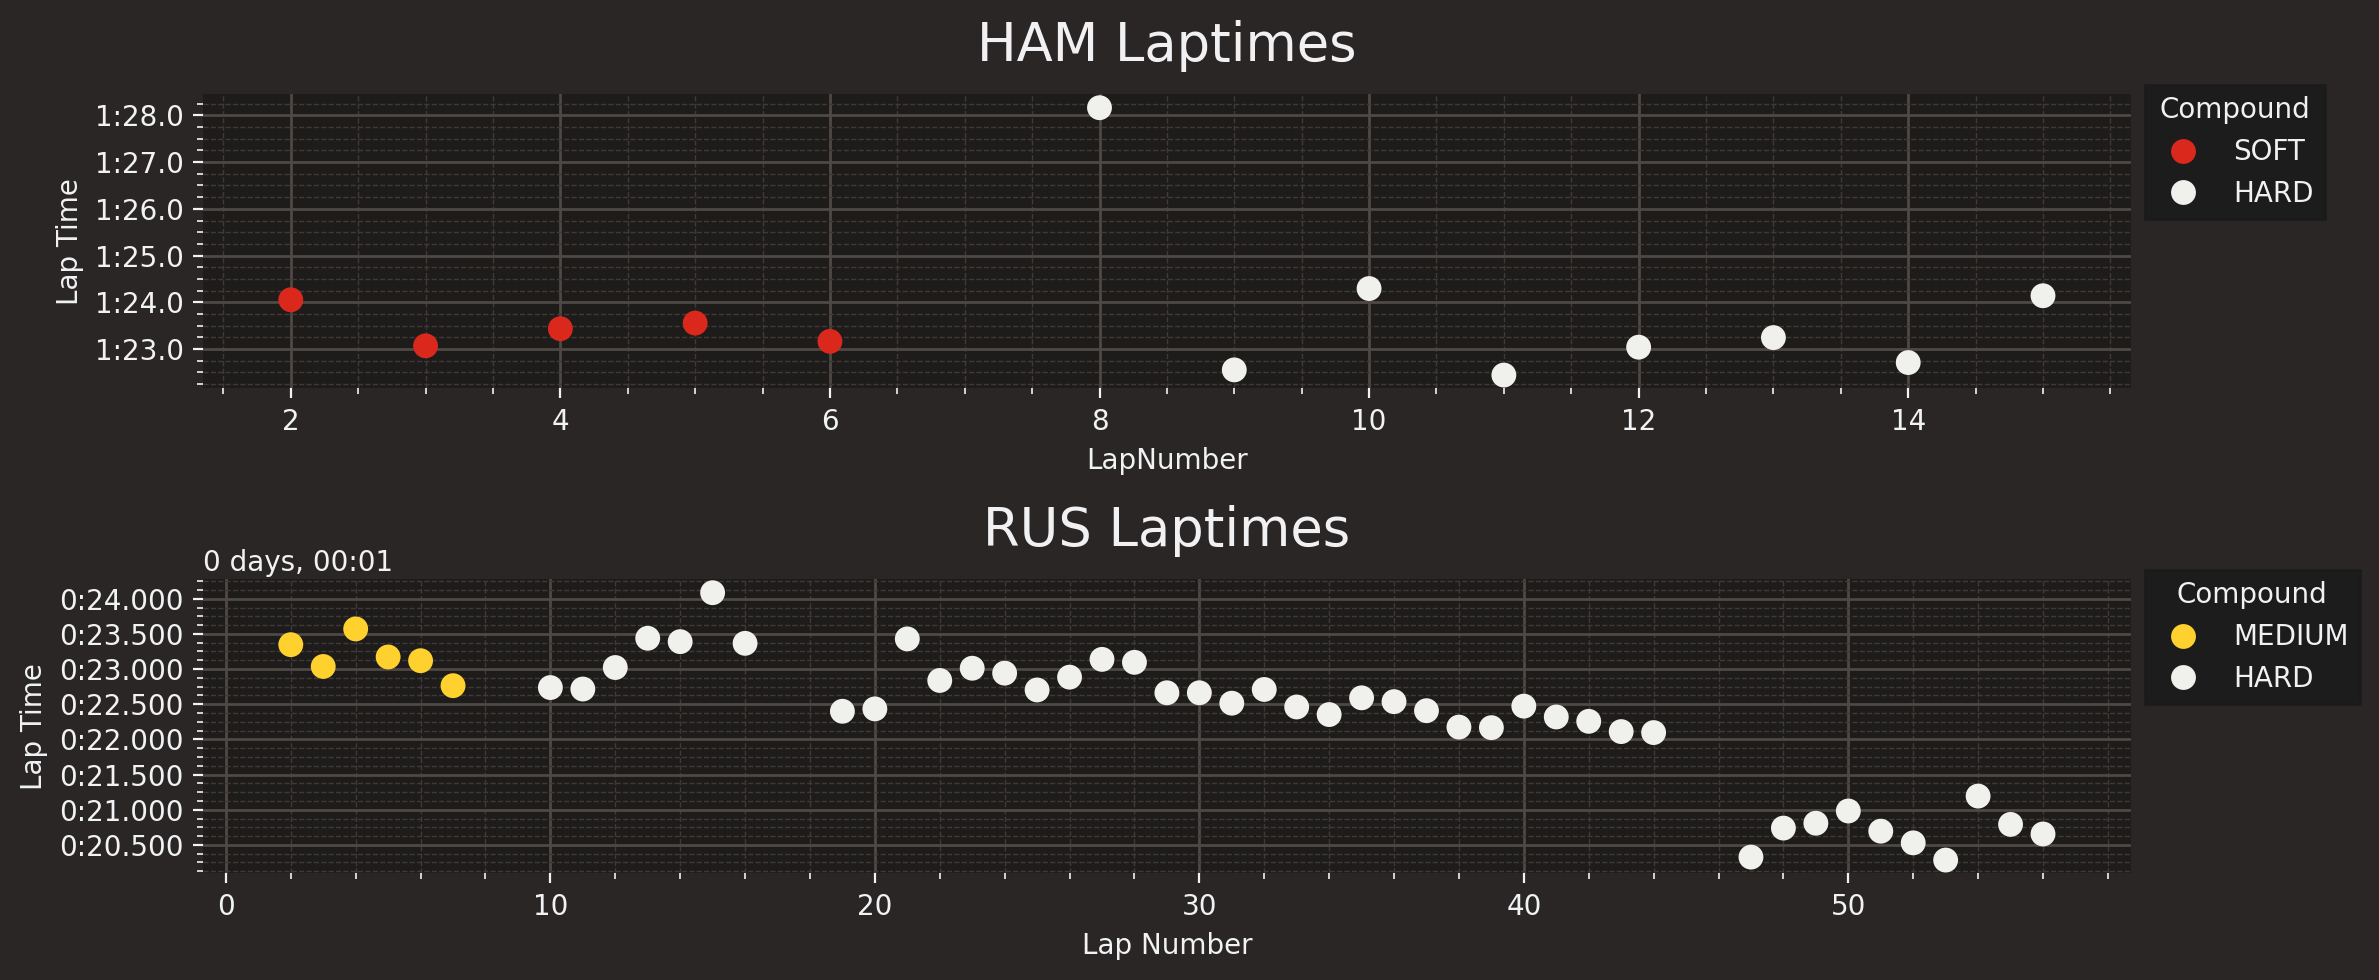

In [64]:
plot_driver_laptimes(session, 'HAM', 'RUS')

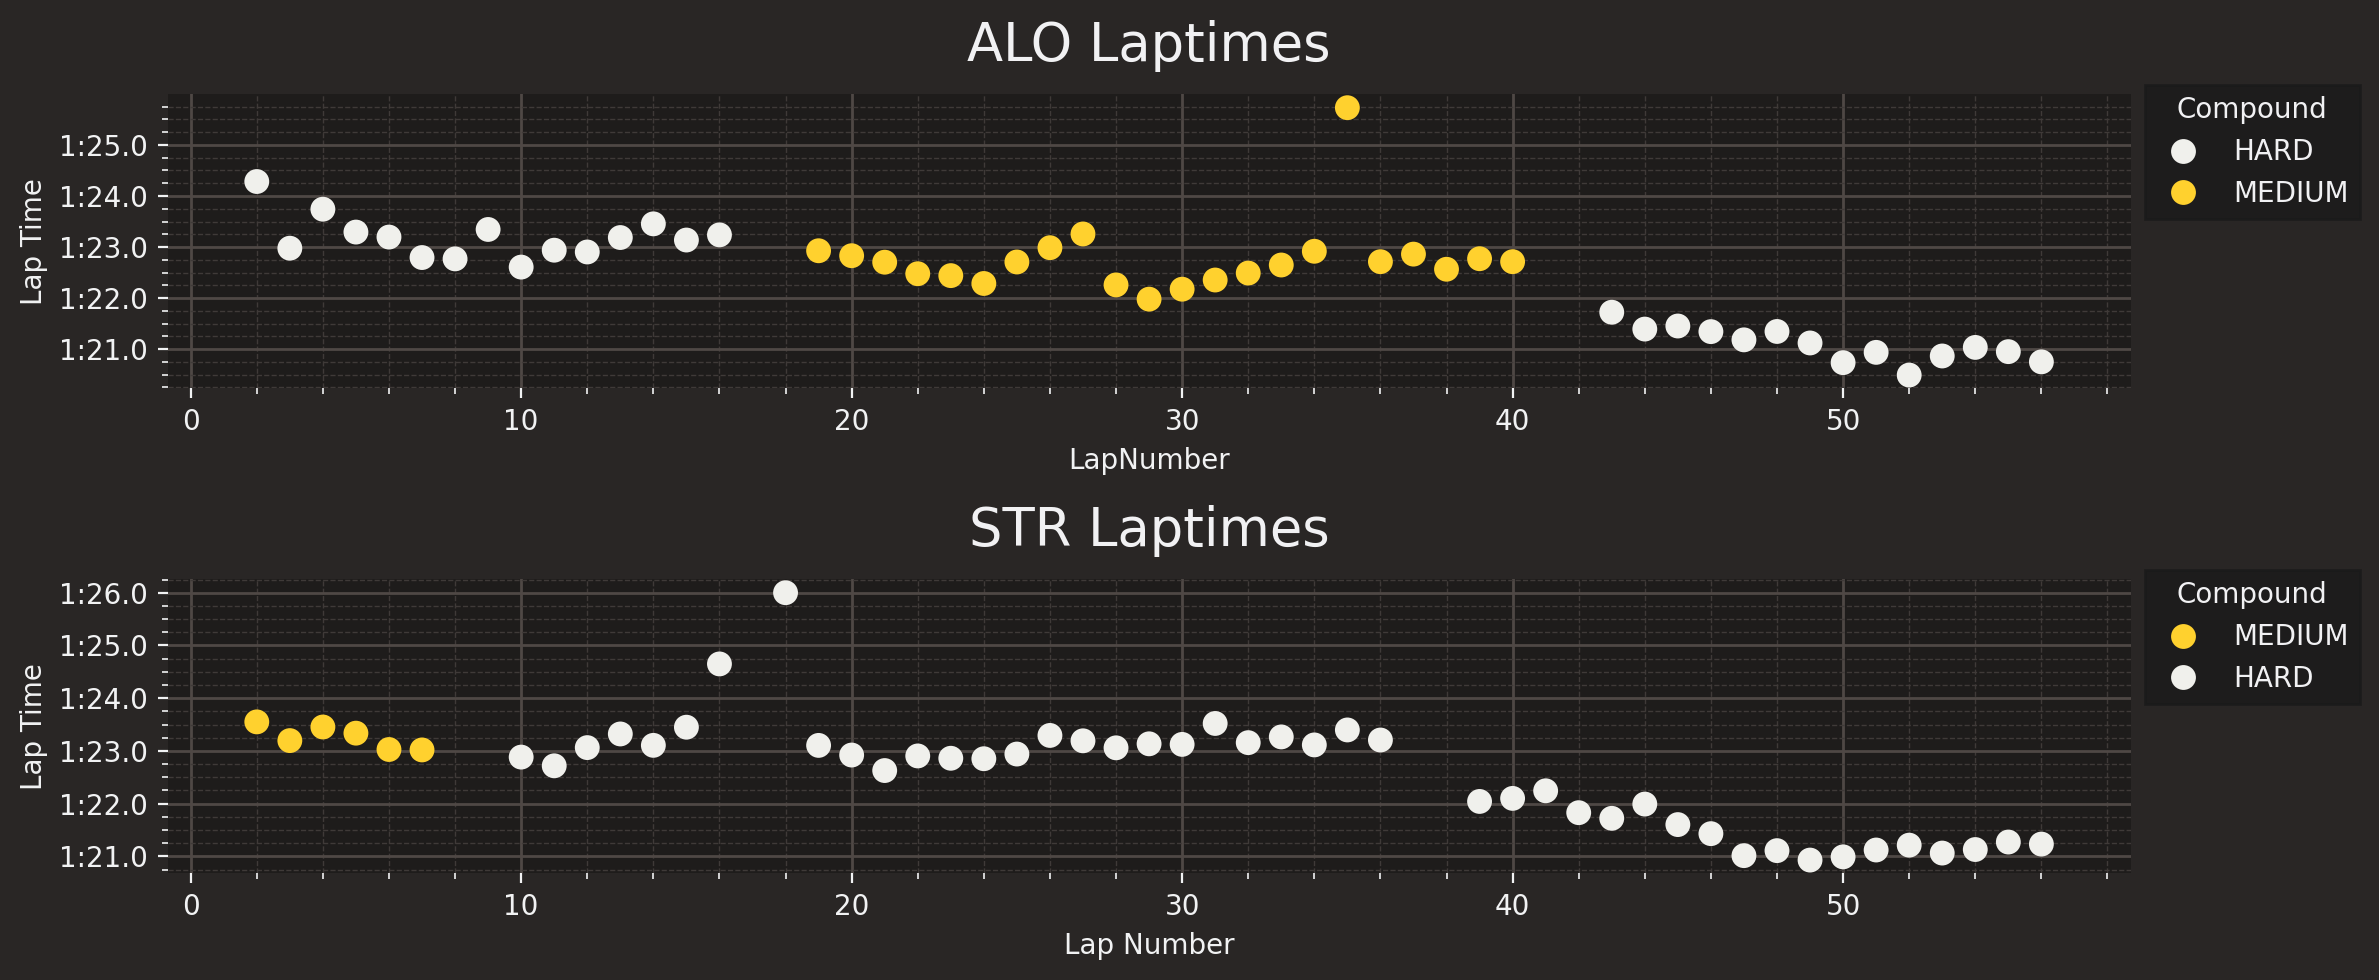

In [65]:
plot_driver_laptimes(session, 'ALO', 'STR')

# Lap Time Distribution 

In [66]:
point_finishers = session.drivers[:10]
print(point_finishers)

driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()
finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

['55', '16', '4', '81', '11', '18', '22', '14', '27', '20']
['SAI', 'LEC', 'NOR', 'PIA', 'PER', 'STR', 'TSU', 'ALO', 'HUL', 'MAG']
{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97'}


In [67]:
fastest_laps_by_team = driver_laps.groupby('Team')['LapTime'].min().reset_index()

In [68]:
all_driver = session.drivers[:]
driver_laps = session.laps.pick_drivers(all_driver).pick_quicklaps()

In [69]:
my_compound = {'SOFT': '#da291c',
 'MEDIUM': '#ffd12e',
 'HARD': '#0a0a0a',
 'INTERMEDIATE': '#43b02a',
 'WET': '#0067ad',
 'UNKNOWN': '#00ffff',
 'TEST-UNKNOWN': '#434649'}

In [70]:
from matplotlib.patches import Patch

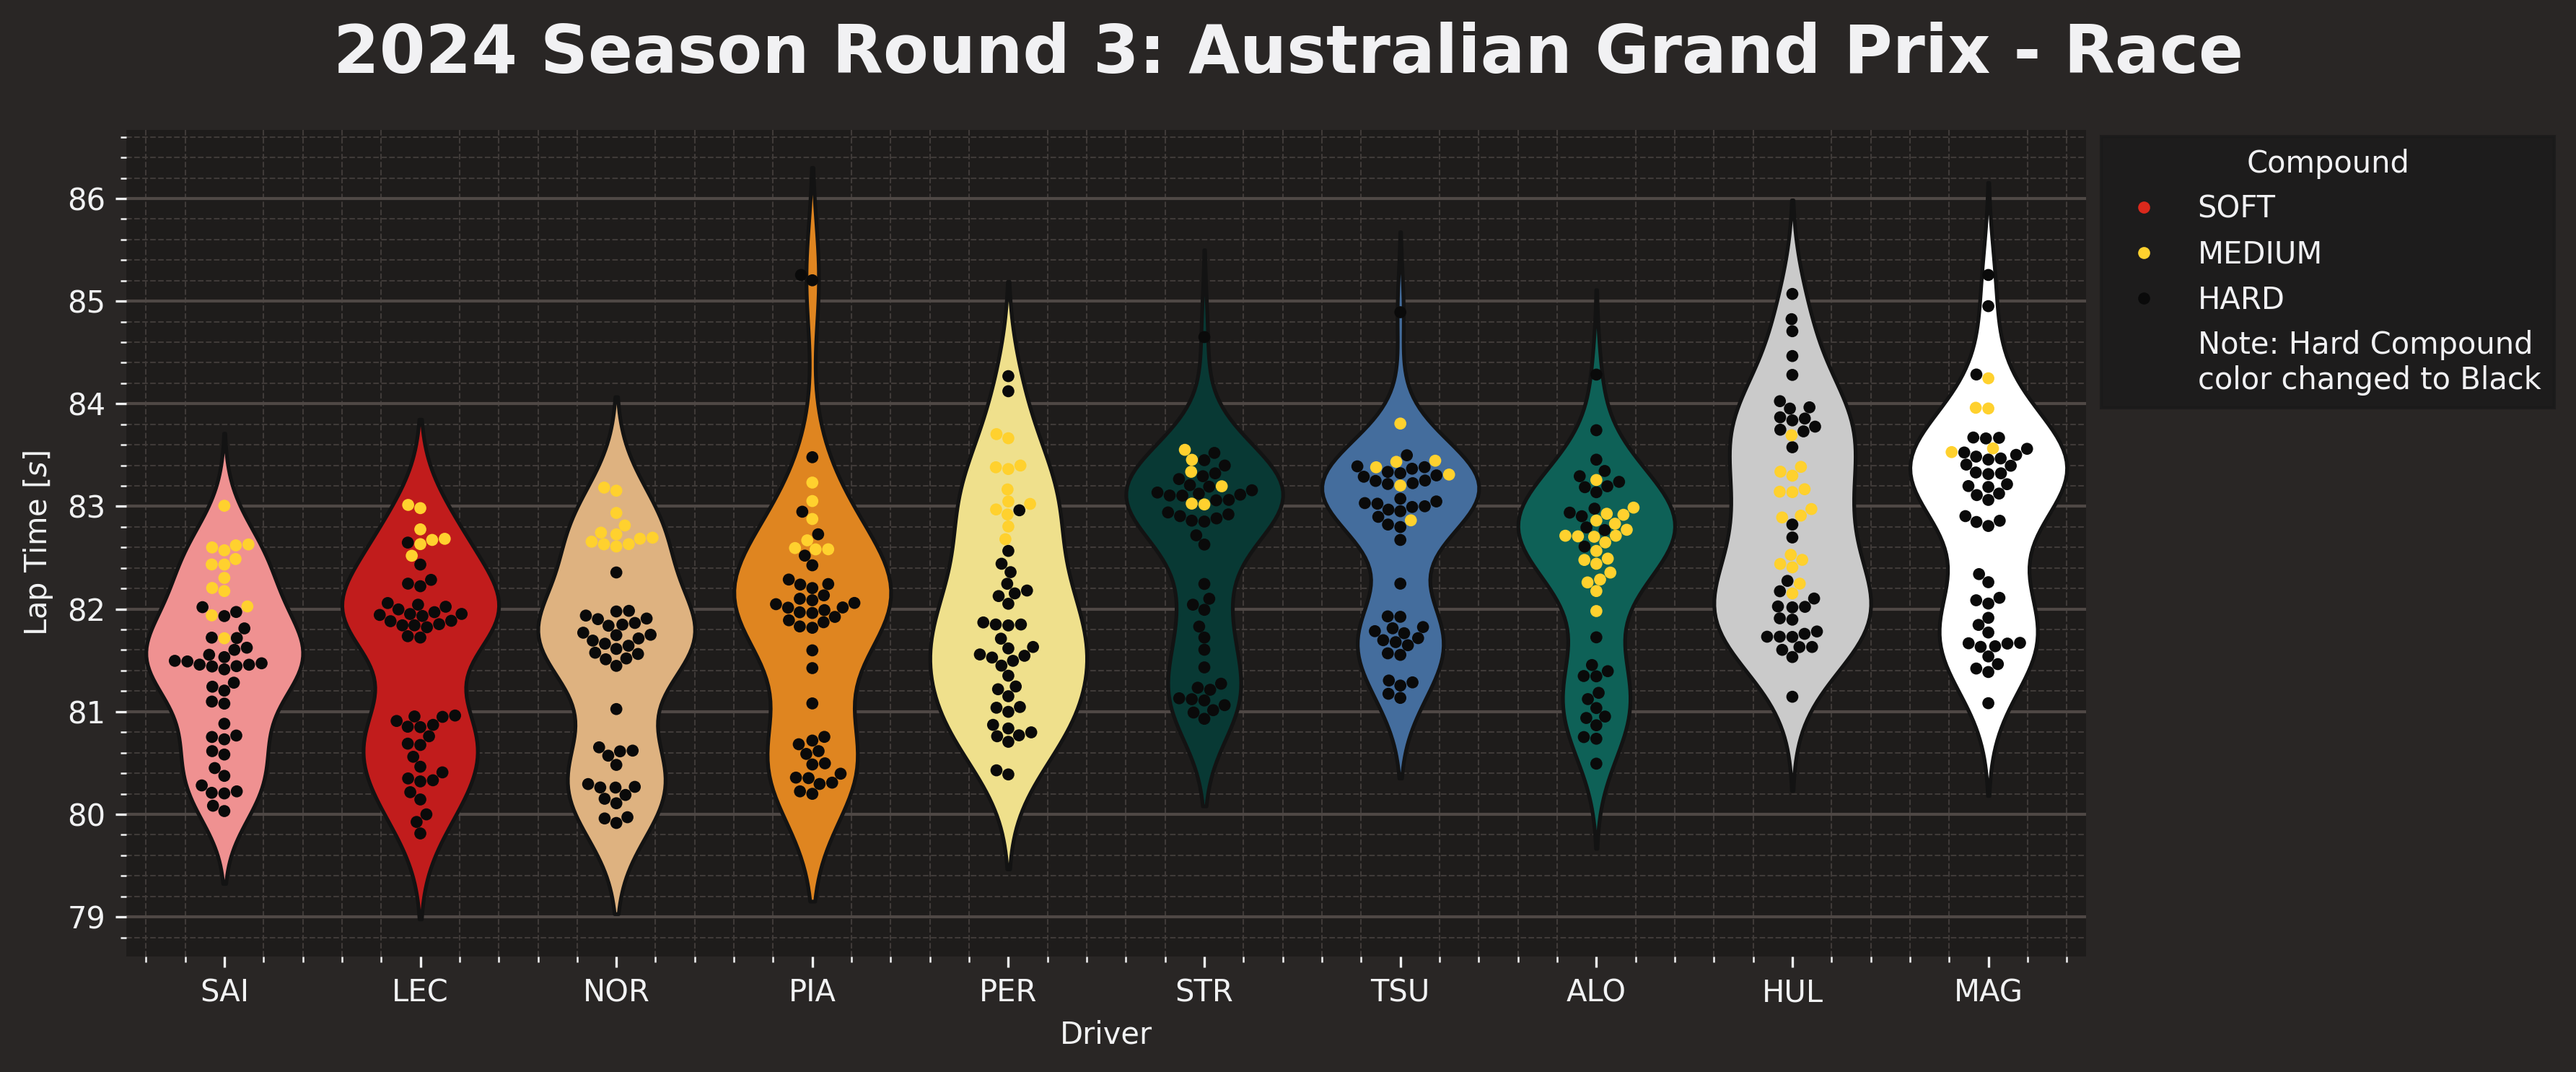

In [71]:
fig, ax = plt.subplots(figsize=(12, 5), dpi = 300)

driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=my_compound,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time $[s]$")

# plot the legend outside the plot 
handles, labels = ax.get_legend_handles_labels()

# Note
note_handle = Patch(color='none')
handles.append(note_handle)
labels.append('Note: Hard Compound \ncolor changed to Black')


ax.legend(handles=handles, labels=labels, title="Compound", loc="upper left", bbox_to_anchor=(1, 1.01))

plt.suptitle(session, fontsize = 22, fontweight = 'bold')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [72]:
import plotly.express as px
import plotly.graph_objects as go

my_compound = {'SOFT': '#da291c',
               'MEDIUM': '#ffd12e',
               'HARD': '#efefef',
               'INTERMEDIATE': '#43b02a',
               'WET': '#0067ad',
               'UNKNOWN': '#00ffff',
               'TEST-UNKNOWN': '#434649'}

driver_laps['LapTime(s)'] = driver_laps['LapTime'].dt.total_seconds()


fig = px.violin(driver_laps, x="Driver", y="LapTime(s)", color="Driver",
                category_orders={"Driver": finishing_order}, 
                color_discrete_map=driver_colors,  
                violinmode='overlay', hover_data = None, hover_name = None,
                labels = None)  

fig.update_traces(hoverinfo='skip', showlegend=False)
for compound, color in my_compound.items():
    filtered_data = driver_laps[driver_laps['Compound'] == compound]
    fig.add_trace(go.Scatter(x=filtered_data['Driver'], y=filtered_data['LapTime(s)'],
                             mode='markers', name=f"{compound}",
                             marker=dict(color=color, size=5), text = ''))

fig.update_layout(legend_title_text='Compound',
                  xaxis_title="Driver",
                  yaxis_title="Lap Time [s]",
                  legend=dict(x=1.05, y=1, bgcolor='rgba(255, 255, 255, 0.5)'),
                  height = 600,
                  width = 850)  

fig.update_traces(marker=dict(line=dict(width=0))) 

fig.show()

In [73]:
import plotly.express as px
import plotly.graph_objects as go


def driver_laptime_violinplot(session):
    point_finisher = session.drivers[:10]
    driver_laps = session.laps.pick_drivers(point_finisher).pick_quicklaps()
    driver_laps = driver_laps.reset_index()
    finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finisher]
    # driver_colors = {
    #     abv: fastf1.plotting.DRIVER_COLORS[driver]
    #     for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()
    # }

    fastest_laps_by_team = driver_laps.groupby("Team")["LapTime"].min().reset_index()

    my_compound = {
        "SOFT": "#da291c",
        "MEDIUM": "#ffd12e",
        "HARD": "#efefef",
        "INTERMEDIATE": "#43b02a",
        "WET": "#0067ad",
        "UNKNOWN": "#00ffff",
        "TEST-UNKNOWN": "#434649",
    }

    driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

    fig = px.violin(
        driver_laps,
        x="Driver",
        y="LapTime(s)",
        color="Driver",
        category_orders={"Driver": finishing_order},
        color_discrete_map=driver_colors,
        violinmode="overlay",
        hover_data=None,
        hover_name=None,
        labels=None,
    )

    fig.update_traces(hoverinfo="skip", showlegend=False)

    for compound, color in my_compound.items():
        filtered_data = driver_laps[driver_laps["Compound"] == compound]
        fig.add_trace(
            go.Scatter(
                x=filtered_data["Driver"],
                y=filtered_data["LapTime(s)"],
                mode="markers",
                name=f"{compound}",
                marker=dict(color=color, size=5),
                text="",
            )
        )

    fig.update_layout(
        legend_title_text="Compound",
        xaxis_title="Driver",
        yaxis_title="Lap Time [s]",
        legend=dict(x=1.05, y=1, bgcolor="rgba(255, 255, 255, 0.5)"),
        height=600,
        width=850,
    )

    fig.update_traces(marker=dict(line=dict(width=0)))

    return fig

In [74]:
driver_laptime_violinplot(session)

In [75]:
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import fastf1

def driver_laptime_violinplot(session):
    point_finisher = session.drivers[:10]
    driver_laps = session.laps.pick_drivers(point_finisher).pick_quicklaps()
    driver_laps = driver_laps.reset_index()
    finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finisher]
    driver_colors = {
        abv: fastf1.plotting.DRIVER_COLORS[driver]
        for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()
    }

    my_compound = {
        "SOFT": "#da291c",
        "MEDIUM": "#ffd12e",
        "HARD": "#efefef",
        "INTERMEDIATE": "#43b02a",
        "WET": "#0067ad",
        "UNKNOWN": "#00ffff",
        "TEST-UNKNOWN": "#434649",
    }

    driver_laps['LapTime(s)'] = driver_laps['LapTime'].dt.total_seconds()

    fig = px.violin(
        driver_laps,
        x="Driver",
        y="LapTime(s)",
        color="Driver",
        category_orders={"Driver": finishing_order},
        color_discrete_map=driver_colors,
        violinmode="overlay",
        hover_data=None,
        hover_name=None,
        labels=None
    )

    fig.update_traces(hoverinfo="skip", showlegend=False)

    for compound, color in my_compound.items():
        filtered_data = driver_laps[driver_laps["Compound"] == compound]
        fig.add_trace(
            go.Scatter(
                x=filtered_data["Driver"],
                y=filtered_data["LapTime(s)"],
                mode='markers', name=f"{compound}",
                marker=dict(color=color, size=5), text=""
            )
        )

    fig.update_layout(
        legend_title_text="Compound",
        xaxis_title="Driver",
        yaxis_title="Lap Time [s]",
        legend=dict(x=1.05, y=1, bgcolor="rgba(255, 255, 255, 0.5)"),
        height=600,
        width=850
    )

    fig.update_traces(marker=dict(line=dict(width=0)))

    st.plotly_chart(fig)  # Use Streamlit's function to display the plot


## Tyre Usage comparison 

In [76]:
from utlis import plot  

ImportError: cannot import name 'plot' from 'utlis' (c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\F1 Data Analysis\season_2024\03_Melbourne\..\utlis.py)